<a href="https://colab.research.google.com/github/Erica-Wong/AnaliseSegurancaPublicaRJ/blob/master/TCC_Step_3_ISP_estudo_da_serie_historica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importando e instalando os pacotes

In [0]:
options(warn=-1)
requiredPackages = c('tidyverse','gdata','caret','plyr','rlang','digest','DataExplorer','dplyr', 'ggplot2', 'ggthemes','forecast', 'tseries')
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) suppressMessages(suppressWarnings(install.packages(p)))
  suppressMessages(suppressWarnings(library(p,character.only = TRUE)))
}


In [53]:
options(warn=0)
load(file="df_isp.RData")
introduce(df_isp)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
5650461,23,21,2,0,0,5650461,129960603,917245296


In [54]:
summary(df_isp)

          controle            ano            MES         
 96136441-2016:     58   Min.   :2010   março  : 503669  
 14903031-2013:     56   1st Qu.:2012   janeiro: 493114  
 83131641-2015:     56   Median :2014   maio   : 491771  
 27025371-2011:     54   Mean   :2014   agosto : 488192  
 30923051-2012:     51   3rd Qu.:2016   abril  : 482851  
 07411121-2015:     51   Max.   :2018   julho  : 479682  
 (Other)      :5650135                  (Other):2711182  
                              titulo_do               total_rbft     
 Lesão corporal dolosa             : 700874   Furto        :1495237  
 Ameaça                            : 657393   não se aplica:2777018  
 Roubo a transeunte                : 621249   Roubo        :1378206  
 Lesão corporal culposa de trânsito: 353511                          
 Furto (outros)                    : 308436                          
 Roubo de veículo                  : 288474                          
 (Other)                           :2720524   

Identificando as TOP 10 DPs com maior volume de ocorrencias

In [55]:
df <- df_isp %>%
      group_by(DP) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(desc(nrow))
df.top10.DP <- head(df,10)

df.top10.DP$DP

[1] Delegacia de Roubos e Furtos de Automóveis
 [2] 035a. Campo Grande                        
 [3] 059a. Duque de Caxias                     
 [4] 034a. Bangu                               
 [5] 064a. Vilar dos Teles                     
 [6] 074a. Alcantara                           
 [7] 032a. Taquara                             
 [8] 021a. Bonsucesso                          
 [9] 005a. Mem de Sá                           
[10] 016a. Barra da Tijuca                     
199 Levels: 001a. Praça Mauá 004a. Praça da República ... 789

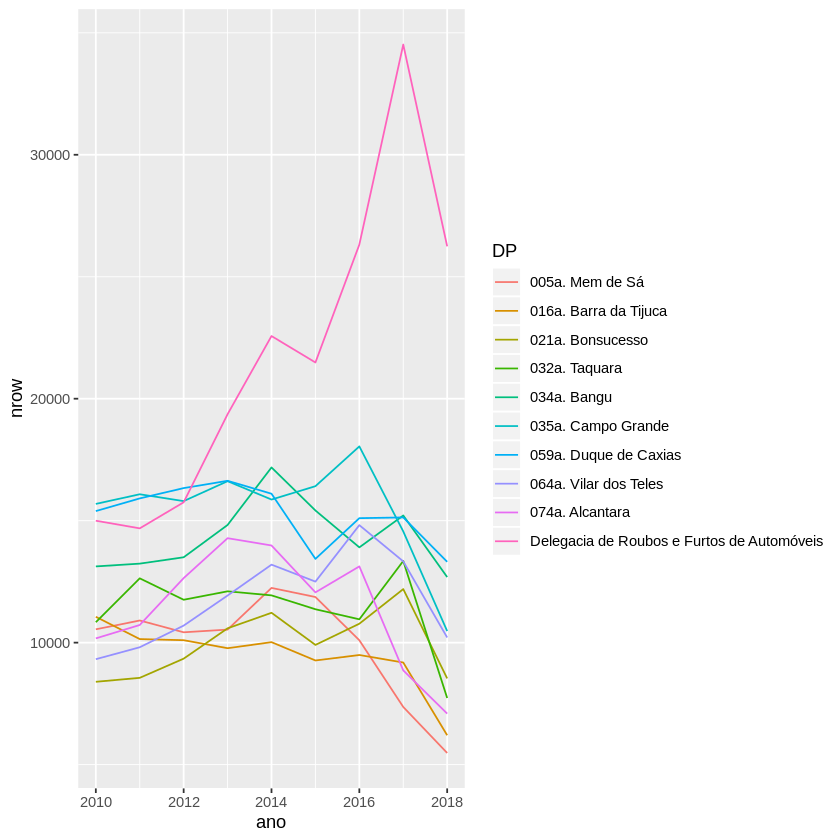

In [56]:
df <- df_isp %>%
      filter(DP %in% df.top10.DP$DP)  %>%
      group_by(ano, DP) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(DP,desc(ano))

df$DP <- factor(df$DP)

# Let's draw
ggplot() + geom_line(data = df, aes(x = ano, y = nrow, color = DP))

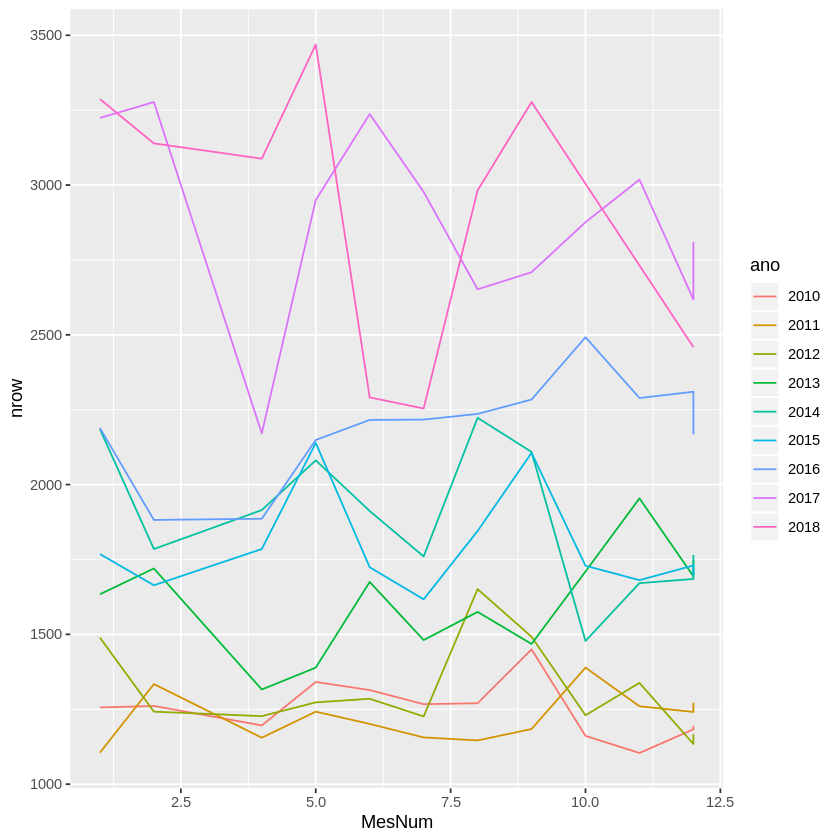

In [57]:

df <- df_isp %>%
      filter(DP %in% c("Delegacia de Roubos e Furtos de Automóveis"))  %>%
      group_by(ano, MES) %>%
      do(data.frame(nrow=nrow(.)))

df$MesNum <- ifelse(df$MES=="janeiro",1,df$MES)
df$MesNum <- ifelse(df$MES=="fevereiro",2,df$MES)
df$MesNum <- ifelse(df$MES=="março",3,df$MES)
df$MesNum <- ifelse(df$MES=="abril",4,df$MES)
df$MesNum <- ifelse(df$MES=="maio",5,df$MES)
df$MesNum <- ifelse(df$MES=="junho",6,df$MES)
df$MesNum <- ifelse(df$MES=="julho",7,df$MES)
df$MesNum <- ifelse(df$MES=="agosto",8,df$MES)
df$MesNum <- ifelse(df$MES=="setembro",9,df$MES)
df$MesNum <- ifelse(df$MES=="outubro",10,df$MES)
df$MesNum <- ifelse(df$MES=="novembro",11,df$MES)
df$MesNum <- ifelse(df$MES=="dezembro",12,df$MES)

df$ano <- factor(df$ano)

# Let's draw
ggplot() + geom_line(data = df, aes(x = MesNum, y = nrow, color = ano))

In [64]:
df <- df_isp %>%
      group_by(titulo_do) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(desc(nrow))
df.top10.titulo_do <- head(df,10)

df.top10.titulo_do$titulo_do

[1] Lesão corporal dolosa              Ameaça                            
 [3] Roubo a transeunte                 Lesão corporal culposa de trânsito
 [5] Furto (outros)                     Roubo de veículo                  
 [7] Estelionato                        Furto a transeunte                
 [9] Recuperação de veículo             Apreensão de drogas               
71 Levels: Ameaça Apreensão de drogas ... Roubo de bicicleta

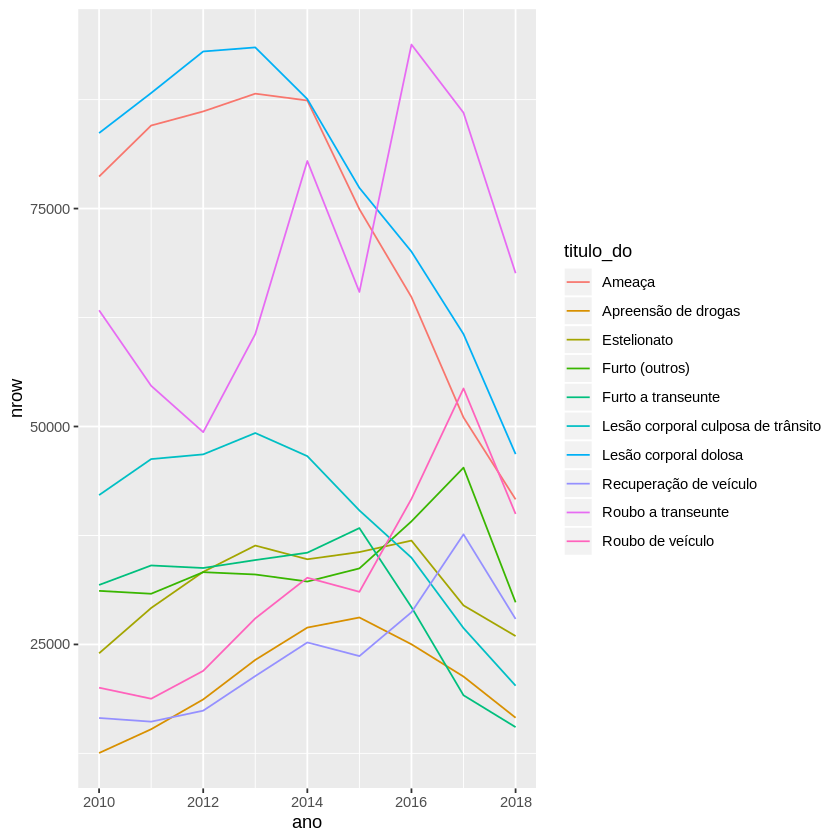

In [65]:
df <- df_isp %>%
      filter(titulo_do %in% df.top10.titulo_do$titulo_do)  %>%
      group_by(ano, titulo_do) %>%
      do(data.frame(nrow=nrow(.))) %>%
      arrange(titulo_do,desc(ano))

df$titulo_do <- factor(df$titulo_do)

# Let's draw
ggplot() + geom_line(data = df, aes(x = ano, y = nrow, color = titulo_do))

Análise exploratória da série temporal

In [0]:
library(ggplot2)
library(ggthemes)
library(forecast)
library(tseries)

 Time-Series [1:90] from 2010 to 2017: 41640 51035 64848 74932 87399 88185 86148 84530 78676 16590 ...


ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

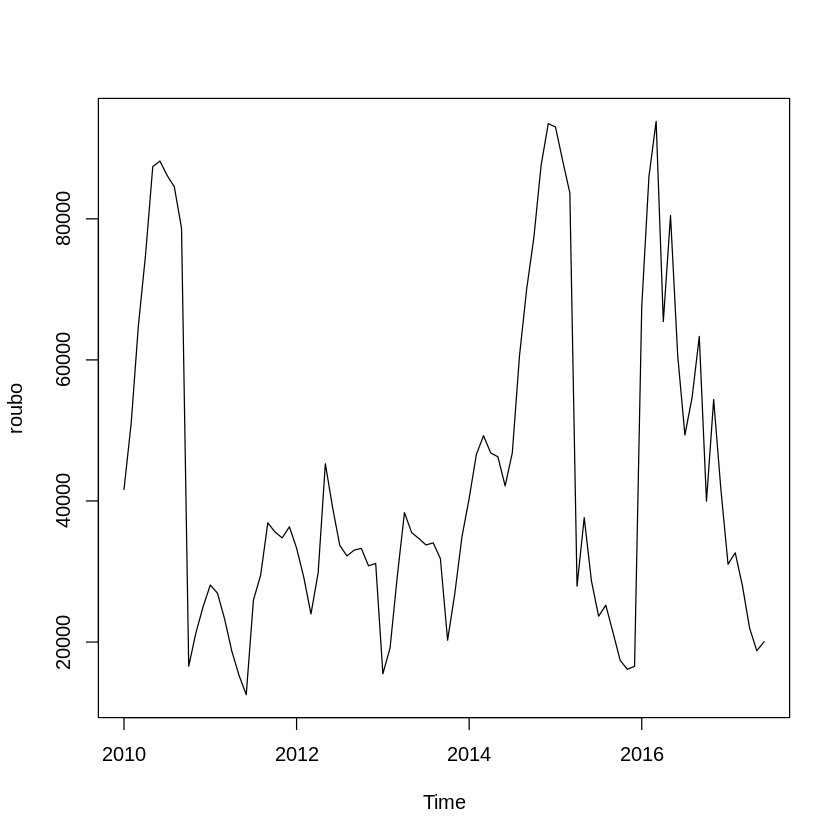

In [67]:
roubo <- ts(df$nrow, start = c(2010,1), frequency = 12)
plot(roubo)
str(roubo)
tail(roubo)

Ciclo da série temporal:

In [70]:
frequency(roubo)
cycle(roubo)

[1] 12

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,,,,,,


ERROR: ignored

Gráfico da série temporal de roubo e furto a automóveis:

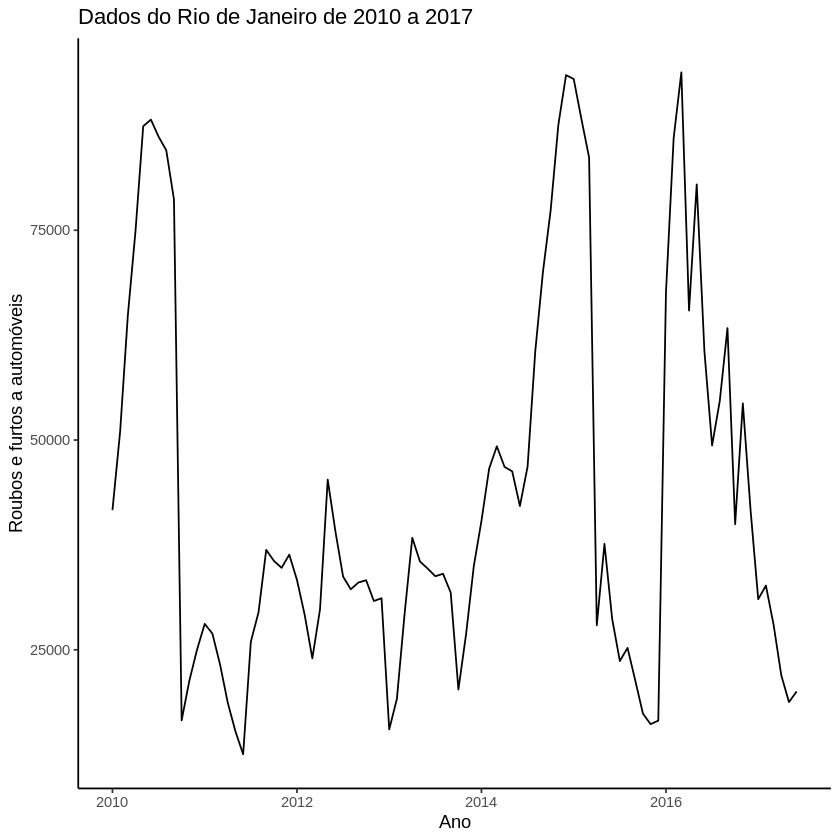

In [71]:
autoplot(roubo) + labs(x ="Ano", y = "Roubos e furtos a automóveis", title="Dados do Rio de Janeiro de 2010 a 2017") + theme_classic()

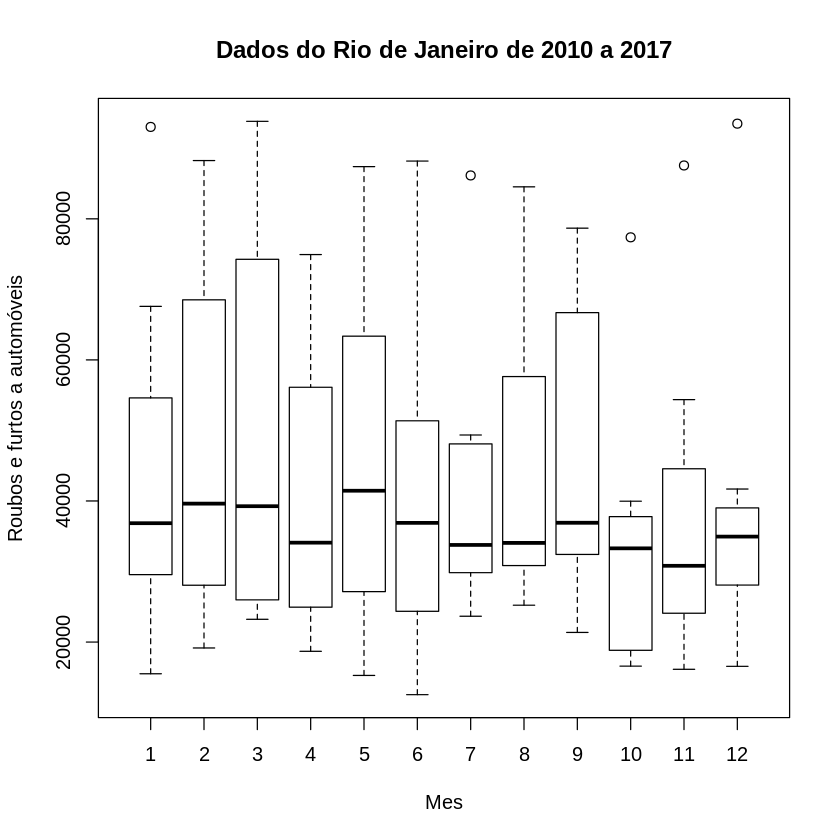

In [72]:
boxplot(roubo~cycle(roubo),xlab="Mes", ylab = "Roubos e furtos a automóveis" ,main ="Dados do Rio de Janeiro de 2010 a 2017")

In [73]:
roubo2 <- tsclean(roubo) 
roubo2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,41640,51035,64848,74932,87399,88185,86148,84530,78676,16590,21312,25016
2011,28089,26933,23227,18690,15273,12545,25959,29472,36912,35595,34770,36342
2012,33327,29181,23984,29829,45280,39121,33721,32213,33024,33290,30813,31145
2013,15511,19163,29275,38348,35524,34681,33768,34059,31823,20265,26872,34950
2014,40371,46599,49253,46804,46264,42133,46834,60600,70063,77376,87561,93490
2015,93025,88259,83666,27922,37630,28690,23663,25227,21370,17402,16140,16561
2016,67586,85993,93818,65437,80461,60600,49353,54668,63333,39969,54366,41696
2017,31035,32651,27983,21968,18770,20036,,,,,,


Decompondo a série temporal:

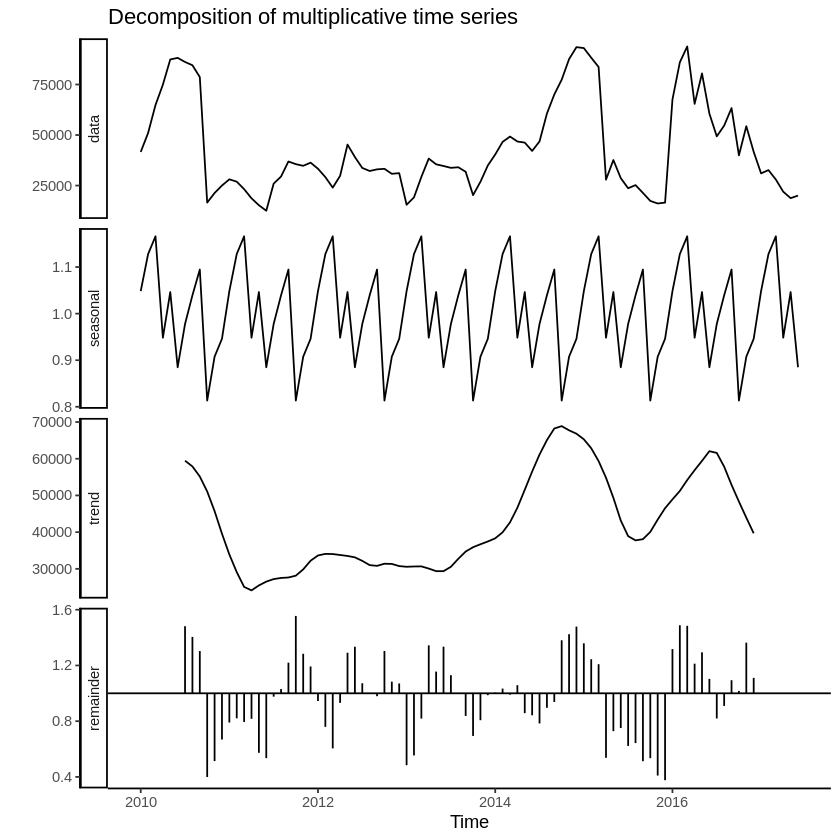

In [74]:
decompose_ts <- decompose(roubo2,"multiplicative")
autoplot(decompose_ts) + theme_classic()

Testando a estacionariedade da série (ADF):

In [75]:
adf.test(roubo2)


	Augmented Dickey-Fuller Test

data:  roubo2
Dickey-Fuller = -3.8709, Lag order = 4, p-value = 0.0191
alternative hypothesis: stationary


Como o p valor do teste ADF é menor que 5%, há forte evidencia contra a hipotese nula e aceitamos com 95% de confiança de que a série de roubos a veiculos é estacionária e por consequencia não é um passeio aleatório.


Testando a estacionariedade da série (Autocorrelaçao):

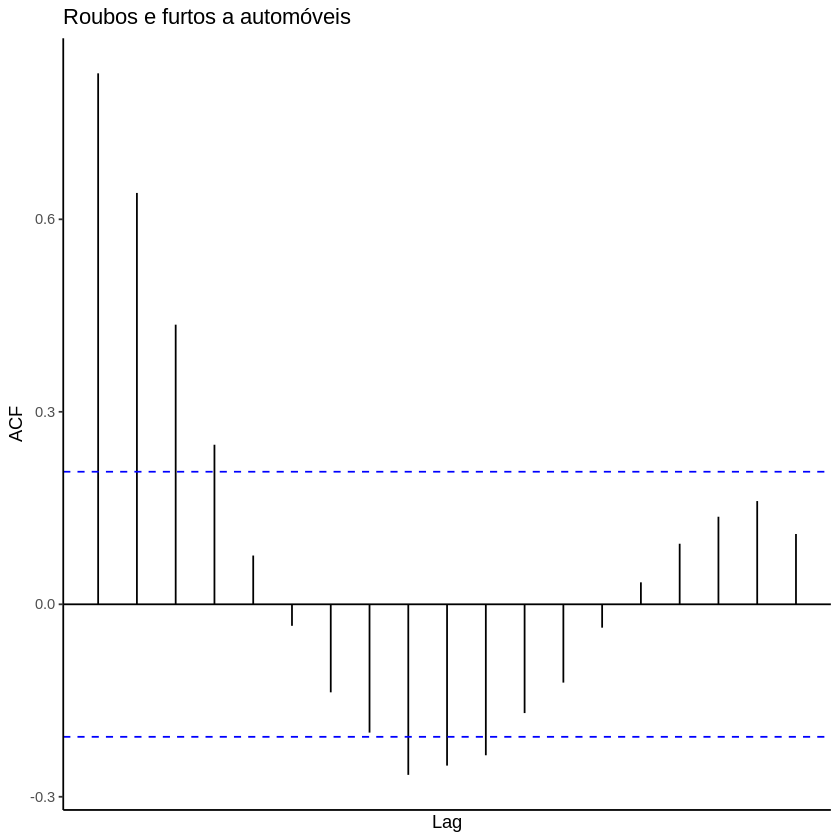

In [76]:
autoplot(acf(roubo2,plot=FALSE))+ labs(title="Roubos e furtos a automóveis") + theme_classic()

In [77]:
# Revendo a serie temporal
decompose_ts$random 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,NA,NA,NA,NA,NA,NA,1.4817248,1.4049763,1.3032090,0.3993498,0.5135624,0.6683254
2011,0.7901449,0.8203354,0.7944403,0.8168932,0.5729113,0.5347554,0.9759805,1.0307049,1.2200824,1.5554983,1.2835639,1.1928970
2012,0.9451115,0.7592718,0.6045046,0.9314672,1.2915194,1.3346031,1.0720834,0.9996064,0.9791823,1.3040379,1.0835412,1.0709578
2013,0.4841574,0.5545170,0.8187265,1.3446404,1.1561463,1.3348800,1.1302358,1.0011581,0.8375888,0.6941262,0.8069417,0.9865201
2014,1.0053000,1.0339731,0.9902574,1.0584464,0.8579490,0.8426573,0.7834215,0.8961404,0.9380032,1.3810235,1.4243467,1.4791235
2015,1.3590604,1.2449668,1.2089876,0.5370654,0.7287897,0.7510912,0.6220766,0.6430500,0.5127296,0.5340468,0.4096862,0.3763069
2016,1.3177634,1.4884736,1.4846213,1.2130251,1.2942220,1.1035506,0.8196046,0.9094911,1.0943319,1.0170447,1.3634851,1.1109966
2017,NA,NA,NA,NA,NA,NA,,,,,,


Como notamos valores missing na série, vamos plotar novamente excluindo os NAs

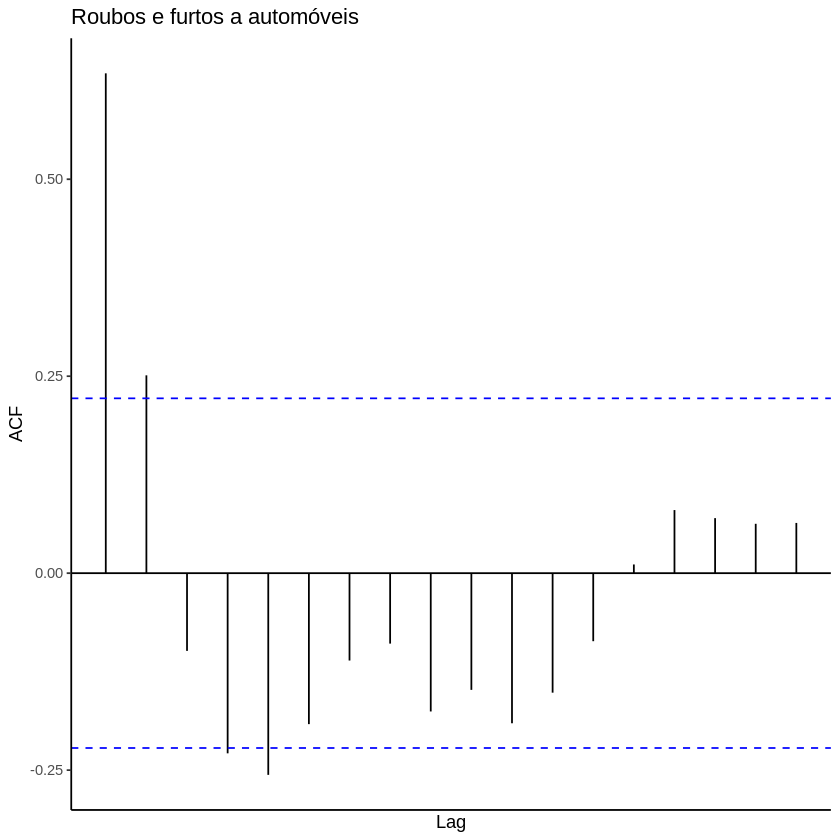

In [78]:

autoplot(acf(na.remove(decompose_ts$random),plot=FALSE))+ labs(title="Roubos e furtos a automóveis")  + theme_classic()

In [79]:
arima_ts <- auto.arima(roubo2)
arima_ts

Series: roubo2 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1       mean
      1.6920  -0.7701  -0.7684  42264.646
s.e.  0.1208   0.0977   0.1438   3887.247

sigma^2 estimated as 155851315:  log likelihood=-975.26
AIC=1960.52   AICc=1961.24   BIC=1973.02

Analise do auto arima...

Fazendo a previsão da série ajustada pelo autoarima:

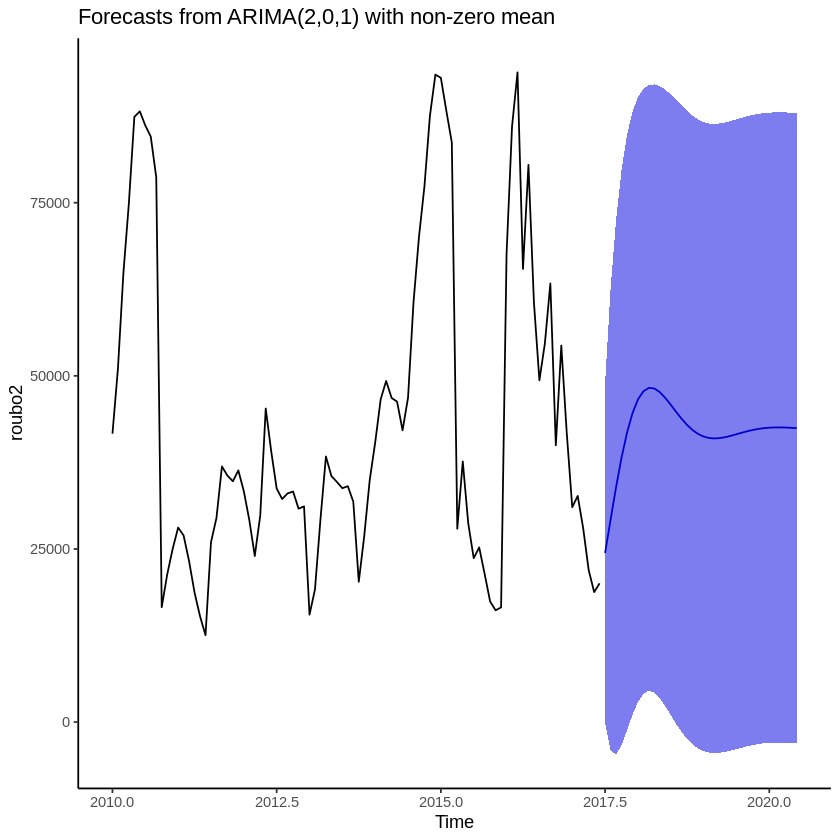

In [82]:
forecast_arimats <- forecast(arima_ts, level = c(95), h = 36)
autoplot(forecast_arimats) + theme_classic()

A previsão da série poderia ser melhorada? 

A ideia agora é melhorarmos a modelagem da série temporal utilizando uma série temporal antecedente, como por exemplo nível de emprego no Rio de Janeiro. A hipótese é de que há correlação positiva entre o aumento do desemprego e o aumento de roubos/furtos a veículos.